In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
from vega_datasets import data
df = data.sf_temps()

Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d %I-%p')
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [6]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


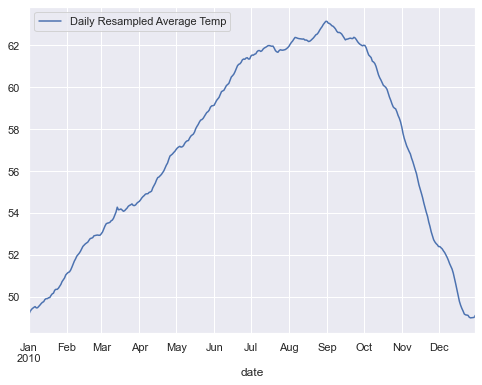

In [7]:
df.resample('D').mean().temp.plot(label='Daily Resampled Average Temp')
plt.legend()
plt.show()

2. Write the code necessary to visualize the minimum temperature over time.

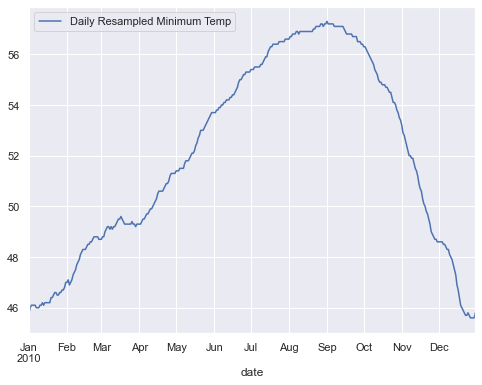

In [8]:
df.resample('D').min().temp.plot(label='Daily Resampled Minimum Temp')
plt.legend()
plt.show()

3. Write the code necessary to visualize the maximum temperature over time.

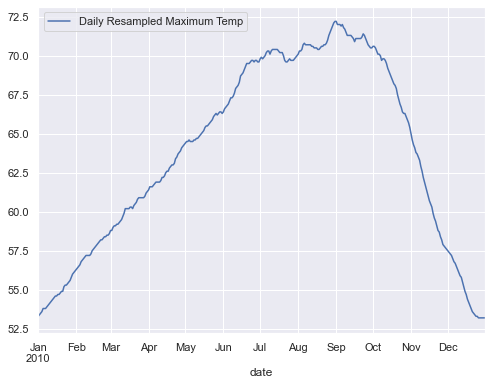

In [9]:
df.resample('D').max().temp.plot(label='Daily Resampled Maximum Temp')
plt.legend()
plt.show()

4. Which month is the coldest, on average?

In [10]:
df.resample('M').mean().nsmallest(1, keep='first', columns='temp')

,temp
date,
2010-01-31,49.98


5. Which month has the highest average temperature?

In [11]:
df.resample('M').mean().nlargest(1, keep='first', columns='temp')

,temp
date,
2010-09-30,62.49


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [12]:
df_daily = df.resample('D').agg(['min', 'max'])
df_daily.head()

temp      
             min   max
date                  
2010-01-01 45.80 53.30
2010-01-02 46.00 53.40
2010-01-03 46.10 53.50
2010-01-04 46.10 53.60
2010-01-05 46.10 53.80

In [13]:
df_daily['diff'] = df_daily.temp['max'] - df_daily.temp['min']
df_daily.head()

temp       diff
             min   max     
date                       
2010-01-01 45.80 53.30 7.50
2010-01-02 46.00 53.40 7.40
2010-01-03 46.10 53.50 7.40
2010-01-04 46.10 53.60 7.50
2010-01-05 46.10 53.80 7.70

In [14]:
df_daily.resample('M').mean().nlargest(1, keep='first', columns='diff')

temp        diff
             min   max      
date                        
2010-09-30 56.90 71.31 14.40

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

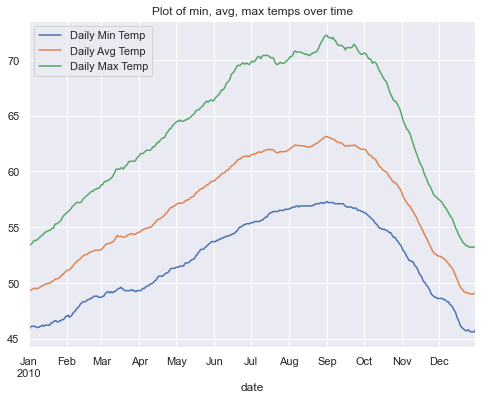

In [15]:
df.resample('D').min().temp.plot(label = 'Daily Min Temp')
df.resample('D').mean().temp.plot(label = 'Daily Avg Temp')
df.resample('D').max().temp.plot(label = 'Daily Max Temp')
plt.title('Plot of min, avg, max temps over time')
plt.legend()
plt.show()

In [16]:
from vega_datasets import data
df = data.seattle_weather()

Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?

In [17]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [18]:
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d %I-%p')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [19]:
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [20]:
df.resample('M').sum().nlargest(1, keep='first', columns='precipitation')

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


- Visualize the amount of monthly precipitation over time.

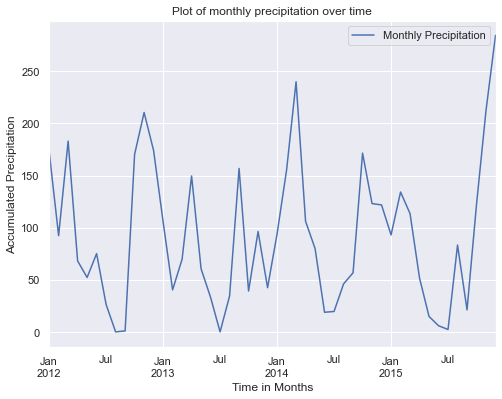

In [21]:
df.resample('M').sum().precipitation.plot(label = 'Monthly Precipitation')
plt.title('Plot of monthly precipitation over time')
plt.xlabel('Time in Months')
plt.ylabel('Accumulated Precipitation')
plt.legend()
plt.show()

- Visualize the amount of wind over time. Choose a time interval you think is appropriate.

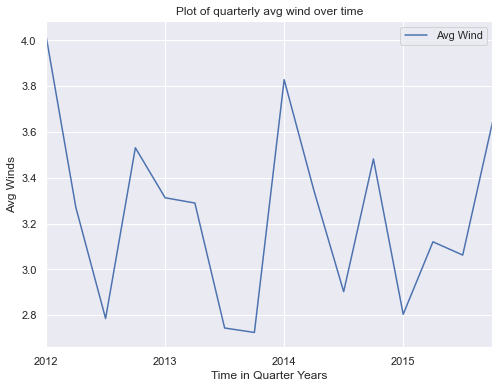

In [22]:
df.resample('Q').mean().wind.plot(label = 'Avg Wind')
plt.title('Plot of quarterly avg wind over time')
plt.xlabel('Time in Quarter Years')
plt.ylabel('Avg Winds')
plt.legend()
plt.show()

- Which year-month combination is the windiest?

In [23]:
df.resample('M').sum().nlargest(1, keep='first', columns='wind')

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


- What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [24]:
df.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [25]:
df['sunny'] = df.weather == 'sun'
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False
2012-01-03,0.80,11.70,7.20,2.30,rain,False
2012-01-04,20.30,12.20,5.60,4.70,rain,False
2012-01-05,1.30,8.90,2.80,6.10,rain,False


In [26]:
df.resample('Y').sum().nlargest(1, keep='first', columns='sunny')

,precipitation,temp_max,temp_min,wind,sunny
date,,,,,
2014-12-31,1232.80,6203.50,3161.80,1236.50,211


- In which month does it rain the most?

In [27]:
df['rainy'] = df.weather == 'rain'
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny,rainy
date,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False,True
2012-01-03,0.80,11.70,7.20,2.30,rain,False,True
2012-01-04,20.30,12.20,5.60,4.70,rain,False,True
2012-01-05,1.30,8.90,2.80,6.10,rain,False,True


In [28]:
df['month'] = df.index.month_name()
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny,rainy,month
date,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,False,January
2012-01-02,10.90,10.60,2.80,4.50,rain,False,True,January
2012-01-03,0.80,11.70,7.20,2.30,rain,False,True,January
2012-01-04,20.30,12.20,5.60,4.70,rain,False,True,January
2012-01-05,1.30,8.90,2.80,6.10,rain,False,True,January


In [29]:
df.groupby('month').sum().rainy.nlargest(1, keep='first')

month
February    40
Name: rainy, dtype: int64

In [30]:
df.groupby('month').sum().precipitation.nlargest(1, keep='first')

month
November   642.50
Name: precipitation, dtype: float64

- Which month has the most number of days with a non-zero amount of precipitation?

In [31]:
df['has_precip'] = df.precipitation > 0
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny,rainy,month,has_precip
date,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,False,January,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False,True,January,True
2012-01-03,0.80,11.70,7.20,2.30,rain,False,True,January,True
2012-01-04,20.30,12.20,5.60,4.70,rain,False,True,January,True
2012-01-05,1.30,8.90,2.80,6.10,rain,False,True,January,True


In [32]:
df.groupby('month').sum().has_precip.nlargest(1, keep='first')

month
December    81
Name: has_precip, dtype: int64

In [37]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


- Convert any negative delays to 0.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [39]:
df = df.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [40]:
df.delay.where(df.delay > 0, 0, inplace=True)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


- Which hour of the day has the highest average delay?

In [42]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [44]:
df.groupby('hour').mean().delay.nlargest(1, keep='first')

hour
3   302.50
Name: delay, dtype: float64

- Does the day of the week make a difference in the delay amount?

In [45]:
df['weekday'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,weekday
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [50]:
df.groupby('weekday').mean().delay.sort_values(ascending=False)

weekday
Friday      17.76
Thursday    12.82
Wednesday   11.03
Sunday      10.41
Tuesday      9.41
Saturday     8.43
Monday       7.17
Name: delay, dtype: float64

- Does the month make a difference in the delay amount?

In [51]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,weekday,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,January


In [52]:
df.groupby('month').mean().delay.sort_values(ascending=False)

month
February   12.31
January    11.30
March       9.88
Name: delay, dtype: float64

Bonus

In [53]:
from vega_datasets import data
df = data.iowa_electricity()

- For each row, calculate the percentage of the year's total that energy source provided.

In [54]:
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [57]:
df = df.set_index('year').sort_index()
df.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


17.0